In [1]:
from pathlib import Path
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score

from sklearn.model_selection import KFold
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import auc

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

np.set_printoptions(suppress=True)

pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.max_colwidth = None

In [2]:
path1 = Path(r"A:\Workspace\Python\Masterarbeit\Kaggle Home Credit Datensatz")
path2 = Path(r"C:\Users\rober\Documents\Workspace\Python\Masterarbeit\Kaggle Home Credit Datensatz")

if path1.is_dir():
    DATASET_DIR = path1
else:
    DATASET_DIR = path2

In [3]:
app_test = pd.read_csv(DATASET_DIR / "application_test.csv")
app_train = pd.read_csv(DATASET_DIR / "application_train.csv")

In [4]:
data = pd.read_csv(DATASET_DIR / "Datengruppierung" / "dataset.csv")
app_train = data

In [5]:
app_train["TARGET"].replace(
    {
        0: "Payback",
        1: "Default"
    }, inplace = True
)

In [6]:
n_heads = ['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']
m_heads = ['CNT_CHILDREN','AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'CNT_FAM_MEMBERS', 'HOUR_APPR_PROCESS_START', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'TOTALAREA_MODE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']
md_heads = ['CNT_CHILDREN', "CNT_FAM_MEMBERS","HOUR_APPR_PROCESS_START", "OBS_30_CNT_SOCIAL_CIRCLE","DEF_30_CNT_SOCIAL_CIRCLE", "OBS_60_CNT_SOCIAL_CIRCLE", "DEF_60_CNT_SOCIAL_CIRCLE","AMT_REQ_CREDIT_BUREAU_HOUR","AMT_REQ_CREDIT_BUREAU_DAY","AMT_REQ_CREDIT_BUREAU_WEEK","AMT_REQ_CREDIT_BUREAU_MON","AMT_REQ_CREDIT_BUREAU_QRT","AMT_REQ_CREDIT_BUREAU_YEAR"]
ms_heads = [head for head in m_heads if head not in md_heads]

In [7]:
m = app_train[m_heads]
n = app_train[n_heads]
md = m[md_heads]
ms = m[ms_heads]

In [8]:
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score

from sklearn.model_selection import KFold
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import auc

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

np.set_printoptions(suppress=True)

pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.max_colwidth = None

In [9]:
path1 = Path(r"A:\Workspace\Python\Masterarbeit\Kaggle Home Credit Datensatz")
path2 = Path(r"C:\Users\rober\Documents\Workspace\Python\Masterarbeit\Kaggle Home Credit Datensatz")

if path1.is_dir():
    DATASET_DIR = path1
else:
    DATASET_DIR = path2

In [10]:
app_test = pd.read_csv(DATASET_DIR / "application_test.csv")
app_train = pd.read_csv(DATASET_DIR / "application_train.csv")

In [11]:
data = pd.read_csv(DATASET_DIR / "Datengruppierung" / "dataset.csv")
app_train = data

In [12]:
app_train["TARGET"].replace(
    {
        0: "Payback",
        1: "Default"
    }, inplace = True
)

In [13]:
n_heads = ['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']
m_heads = ['CNT_CHILDREN','AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'CNT_FAM_MEMBERS', 'HOUR_APPR_PROCESS_START', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'TOTALAREA_MODE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']
md_heads = ['CNT_CHILDREN', "CNT_FAM_MEMBERS","HOUR_APPR_PROCESS_START", "OBS_30_CNT_SOCIAL_CIRCLE","DEF_30_CNT_SOCIAL_CIRCLE", "OBS_60_CNT_SOCIAL_CIRCLE", "DEF_60_CNT_SOCIAL_CIRCLE","AMT_REQ_CREDIT_BUREAU_HOUR","AMT_REQ_CREDIT_BUREAU_DAY","AMT_REQ_CREDIT_BUREAU_WEEK","AMT_REQ_CREDIT_BUREAU_MON","AMT_REQ_CREDIT_BUREAU_QRT","AMT_REQ_CREDIT_BUREAU_YEAR"]
ms_heads = [head for head in m_heads if head not in md_heads]

In [14]:
m = app_train[m_heads]
n = app_train[n_heads]
md = m[md_heads]
ms = m[ms_heads]

In [15]:
# transformiert kategorische variablen in integer
for head in n_heads:
    app_train[head], cats = pd.factorize(app_train[head])

In [16]:
y = app_train["TARGET"]
x = app_train.drop(["SK_ID_CURR", "TARGET"], axis=1)

In [17]:
# ersätzt alle np.nan durch 0
x = x.fillna(0)

In [18]:
# unterteilt den trainingsdatensatz in trainings- und validierungsdatensätze
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.5, random_state=0)

In [19]:
# logistisches Regressionsmodell
model = LogisticRegression(random_state=0, max_iter=1000)

In [20]:
model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 1000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 0,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [20]:
# Konfidenzlevel der einzelnen Klassen
y_score = model.fit(x_train, y_train).decision_function(x_test)

c:\users\rober\documents\workspace\python\masterarbeit\venv\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [21]:
# Prognosewerte der Testdaten
model.predict(x_test)

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [22]:
# Prognosewerte der Testdaten in %
x_test_prob = model.predict_proba(x_test)
x_test_prob

array([[0.00900061, 0.99099939],
       [0.07337878, 0.92662122],
       [0.00573636, 0.99426364],
       ...,
       [0.1149916 , 0.8850084 ],
       [0.09317525, 0.90682475],
       [0.12820481, 0.87179519]])

In [23]:
# Durchschnittliche Trefferwahrscheinlichkeit
model.score(x_test, y_test)

0.9192616873487864

In [24]:
# Erstellung der AUC & ROC-Metrik
# Wahrscheinlichkeiten für keinen Kreditausfall
prob = x_test_prob[:,1]
auc = roc_auc_score(y_test, prob)
print(auc)
# FalsePositiveRate, TruePositiveRate & Treshold
fpr, tpr, threshold = roc_curve(y_test, prob)

0.6737686575070241


In [25]:
aucs = []

kfold = KFold(5, True, 1)
data = x

# enumerate splits
for i, (train, test) in enumerate(kfold.split(data)):
    model.fit(x.loc[train], y.loc[train])
    
    # Prognosewerte der Testdaten in %
    x_test_prob = model.predict_proba(x.loc[test])

    # Erstellung der AUC & ROC-Metrik
    # Wahrscheinlichkeiten für keinen Kreditausfall
    prob = x_test_prob[:,1]
    auc = roc_auc_score(y.loc[test], prob)
    aucs.append(auc)
    print('train: %s, test: %s, auc: %s' % (train, test, auc))

print("\n")
print("Durchschnitt: %.2f" % (np.mean(aucs)))
print("Standardabw.: %.2f" % (np.std(aucs)))
print("Varianz:      %.2f" % (np.var(aucs)))

c:\users\rober\documents\workspace\python\masterarbeit\venv\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass shuffle=True, random_state=1 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
c:\users\rober\documents\workspace\python\masterarbeit\venv\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


train: [     0      2      3 ... 307508 307509 307510], test: [     1      4      6 ... 307493 307495 307501], auc: 0.6765469152630036


c:\users\rober\documents\workspace\python\masterarbeit\venv\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


train: [     0      1      2 ... 307508 307509 307510], test: [     3     18     22 ... 307499 307503 307504], auc: 0.6723431230538286


c:\users\rober\documents\workspace\python\masterarbeit\venv\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


train: [     0      1      2 ... 307508 307509 307510], test: [     9     10     15 ... 307489 307492 307502], auc: 0.6692891717897019


c:\users\rober\documents\workspace\python\masterarbeit\venv\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


train: [     0      1      2 ... 307506 307507 307508], test: [    12     16     23 ... 307505 307509 307510], auc: 0.6732132376967601


c:\users\rober\documents\workspace\python\masterarbeit\venv\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


train: [     1      3      4 ... 307505 307509 307510], test: [     0      2      5 ... 307506 307507 307508], auc: 0.6703381520055347


Durchschnitt: 0.67
Standardabw.: 0.00
Varianz:      0.00


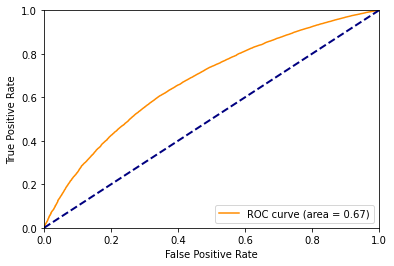

In [26]:
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

### Drop aus Ridge Regression

In [27]:
drop = ["('DAYS_CREDIT', 1.0)", "('AMT_CREDIT_MAX_OVERDUE', 0.75)", "('AMT_TOTAL_RECEIVABLE', 0.25)", "('AMT_CREDIT_SUM_DEBT', 0.75)", "('AMT_CREDIT_MAX_OVERDUE', 0.5)", "('AMT_BALANCE', 0.5)", "('AMT_RECEIVABLE_PRINCIPAL', 0.0)", "('AMT_PAYMENT', 1.0)", "('AMT_TOTAL_RECEIVABLE', 0.5)", "('AMT_CREDIT_SUM_DEBT', 1.0)", "('DAYS_CREDIT_UPDATE', 0.0)", "('AMT_BALANCE', 0.75)", "('DAYS_LAST_DUE_1ST_VERSION', 0.0)", "('DAYS_LAST_DUE_1ST_VERSION', 0.5)", "('CNT_DRAWINGS_ATM_CURRENT', 1.0)", 'REGION_POPULATION_RELATIVE', 'ELEVATORS_AVG', 'WALLSMATERIAL_MODE', "('AMT_INSTALMENT', 0.75)", "('CNT_PAYMENT', 0.5)", "('AMT_CREDIT_SUM_DEBT', 0.25)", "('AMT_RECIVABLE', 0.5)", "('AMT_BALANCE', 1.0)", "('AMT_PAYMENT_CURRENT', 0.25)", "('CNT_DRAWINGS_POS_CURRENT', 0.75)", "('DAYS_FIRST_DUE', 0.5)", "('AMT_ANNUITY', 0.5)_pa", "('CNT_INSTALMENT_MATURE_CUM', 0.5)", "('AMT_TOTAL_RECEIVABLE', 1.0)", "('AMT_CREDIT_MAX_OVERDUE', 0.0)", "('DAYS_DECISION', 0.75)", "('HOUR_APPR_PROCESS_START', 0.0)", "('AMT_PAYMENT_TOTAL_CURRENT', 0.25)", "('HOUR_APPR_PROCESS_START', 0.75)", '43', "('AMT_GOODS_PRICE', 1.0)", "('AMT_CREDIT_SUM', 0.0)", "('AMT_APPLICATION', 0.25)", '1', "('AMT_DRAWINGS_CURRENT', 1.0)", "('AMT_INST_MIN_REGULARITY', 0.75)", "('DAYS_LAST_DUE', 0.5)", "('AMT_CREDIT', 0.75)", "('AMT_DRAWINGS_ATM_CURRENT', 0.5)", "('AMT_GOODS_PRICE', 0.5)", "('AMT_DRAWINGS_CURRENT', 0.5)", "('AMT_ANNUITY', 0.75)_pa", 'YEARS_BUILD_AVG', "('HOUR_APPR_PROCESS_START', 0.25)", "('HOUR_APPR_PROCESS_START', 1.0)", 'BASEMENTAREA_AVG', '4', "('AMT_CREDIT_SUM_OVERDUE', 0.5)", "('CNT_DRAWINGS_CURRENT', 0.5)", "('RATE_DOWN_PAYMENT', 0.5)", "('DAYS_DECISION', 1.0)", '58', "('MONTHS_BALANCE', 0.5)_cc", "('AMT_DRAWINGS_POS_CURRENT', 0.75)", "('CNT_INSTALMENT_MATURE_CUM', 0.25)", '10', "('CREDIT_DAY_OVERDUE', 0.75)", 'AMT_INCOME_TOTAL', '38', 'OBS_30_CNT_SOCIAL_CIRCLE', '29', 'FLOORSMIN_AVG', "('AMT_DRAWINGS_POS_CURRENT', 0.5)", "('CNT_INSTALMENT_MATURE_CUM', 1.0)", '31', "('AMT_APPLICATION', 1.0)", '57', "('CNT_INSTALMENT_FUTURE', 0.0)", "('AMT_ANNUITY', 1.0)", '7', '20', "('SK_DPD_DEF', 1.0)_cc", '34', 'Card X-Sell', "('AMT_DOWN_PAYMENT', 0.0)", 'NAME_TYPE_SUITE', 'Cash Street: low', '2', '9', "('AMT_CREDIT_LIMIT_ACTUAL', 0.0)", "('AMT_ANNUITY', 0.75)", 'NONLIVINGAREA_AVG', '66', '40', '49', '28', '13', '48', "('CNT_DRAWINGS_POS_CURRENT', 0.25)", "('AMT_CREDIT_SUM_LIMIT', 0.25)", '24', '32', '45', "('CNT_DRAWINGS_POS_CURRENT', 0.5)", '36', "('AMT_ANNUITY', 0.5)", "('AMT_DRAWINGS_POS_CURRENT', 0.0)", "('AMT_INST_MIN_REGULARITY', 0.0)", "('SK_DPD_DEF', 0.75)_cc", "('NFLAG_INSURED_ON_APPROVAL', 0.25)", 'LIVE_CITY_NOT_WORK_CITY', "('SK_DPD', 0.5)", "('CNT_CREDIT_PROLONG', 1.0)", '35', '47', "('DAYS_FIRST_DRAWING', 1.0)", '178', 'POS mobile without interest', '82', '181', 'AMT_REQ_CREDIT_BUREAU_WEEK', "('CNT_CREDIT_PROLONG', 0.5)", '96', '12', "('SK_DPD', 0.0)", '114', '136', "('RATE_INTEREST_PRIVILEGED', 0.75)", "('RATE_INTEREST_PRIVILEGED', 0.5)", '128', 'Loan for business development', 'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_DAY', '93', '22', '131', '72', 'POS industry without interest', '86', '116', "('AMT_CREDIT_SUM_OVERDUE', 0.0)", '75', 'FLAG_OWN_REALTY', '79', "('RATE_INTEREST_PRIVILEGED', 0.25)", '156', '78', '137', 'Signed_cc', '122', '99', '80', '138', '89', '95', '127', '87', 'FLAG_DOCUMENT_11', "('CNT_DRAWINGS_OTHER_CURRENT', 0.75)", '74', 'AMT_REQ_CREDIT_BUREAU_MON', "('AMT_DRAWINGS_OTHER_CURRENT', 0.5)", 'Another type of loan', '151', 'Car loan', '90', "('NFLAG_INSURED_ON_APPROVAL', 1.0)", '208', 'Unknown type of loan', '91', "('RATE_INTEREST_PRIVILEGED', 0.0)", '196', '223', '225', '228', '230', '231', '234', '235', '237', '238', '240', '221', '218', '198', '200', '201', '203', '205', '207', '209', '212', '214', '244', 'Demand_cc', '268', '270', '272', '274', '276', "('AMT_DRAWINGS_OTHER_CURRENT', 0.25)", "('CNT_DRAWINGS_OTHER_CURRENT', 0.25)", "('SK_DPD_DEF', 0.0)_cc", "('SK_DPD_DEF', 0.5)_cc", '267', '265', '246', '247', '248', '250', '252', '253', '256', '258', '260', '262', '197', "('SK_DPD_DEF', 0.0)", 'XNA', '73', '84', '113', "('NFLAG_LAST_APPL_IN_DAY', 0.75)", 'FLAG_DOCUMENT_10', 'REG_REGION_NOT_WORK_REGION', 'FLAG_DOCUMENT_7', 'Real estate loan', "('CNT_CREDIT_PROLONG', 0.0)", 'Interbank credit', 'Loan for purchase of shares (margin lending)', '126', '194', '169', '170', '177', '183', '184', '191', '192', '165', '163', '135', '140', '141', '144', '161', '152', '153', '154', '158']

In [28]:
heads = [feature for feature in x.columns if feature not in drop]

In [29]:
x = x[heads]

In [30]:
aucs = []

kfold = KFold(5, True, 1)
data = x

# enumerate splits
for i, (train, test) in enumerate(kfold.split(data)):
    model.fit(x.loc[train], y.loc[train])
    
    # Prognosewerte der Testdaten in %
    x_test_prob = model.predict_proba(x.loc[test])

    # Erstellung der AUC & ROC-Metrik
    # Wahrscheinlichkeiten für keinen Kreditausfall
    prob = x_test_prob[:,1]
    auc = roc_auc_score(y.loc[test], prob)
    aucs.append(auc)
    print('train: %s, test: %s, auc: %s' % (train, test, auc))

print("\n")
print("Durchschnitt: %.2f" % (np.mean(aucs)))
print("Standardabw.: %.2f" % (np.std(aucs)))
print("Varianz:      %.2f" % (np.var(aucs)))

c:\users\rober\documents\workspace\python\masterarbeit\venv\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass shuffle=True, random_state=1 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
c:\users\rober\documents\workspace\python\masterarbeit\venv\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


train: [     0      2      3 ... 307508 307509 307510], test: [     1      4      6 ... 307493 307495 307501], auc: 0.6748056449357173


c:\users\rober\documents\workspace\python\masterarbeit\venv\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


train: [     0      1      2 ... 307508 307509 307510], test: [     3     18     22 ... 307499 307503 307504], auc: 0.6712056609084716


c:\users\rober\documents\workspace\python\masterarbeit\venv\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


train: [     0      1      2 ... 307508 307509 307510], test: [     9     10     15 ... 307489 307492 307502], auc: 0.6678444994342358


c:\users\rober\documents\workspace\python\masterarbeit\venv\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


train: [     0      1      2 ... 307506 307507 307508], test: [    12     16     23 ... 307505 307509 307510], auc: 0.6708043173602507


c:\users\rober\documents\workspace\python\masterarbeit\venv\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


train: [     1      3      4 ... 307505 307509 307510], test: [     0      2      5 ... 307506 307507 307508], auc: 0.6684940411321858


Durchschnitt: 0.67
Standardabw.: 0.00
Varianz:      0.00
